In [1]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# zip_ref=zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories, {len(filenames)} images in {dirpath}.")

There are 2 directories, 0 images in pizza_steak.
There are 2 directories, 0 images in pizza_steak/train.
There are 0 directories, 750 images in pizza_steak/train/steak.
There are 0 directories, 750 images in pizza_steak/train/pizza.
There are 2 directories, 0 images in pizza_steak/test.
There are 0 directories, 250 images in pizza_steak/test/steak.
There are 0 directories, 250 images in pizza_steak/test/pizza.


In [61]:
#Getting the labels name programmitically

class_names=os.listdir("pizza_steak/train")
class_names

['steak', 'pizza']

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_random_image(target_dir,target_class):
    target_folder=f"pizza_steak/{target_dir}/{target_class}"
    random_image=random.sample(os.listdir(target_folder),1)

    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape:{img.shape}")

    return img

Image shape:(512, 384, 3)


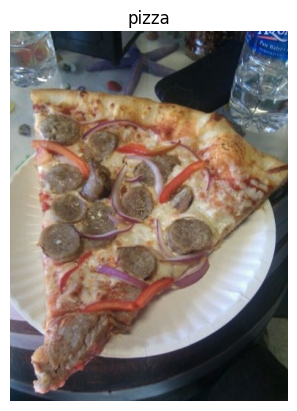

In [5]:
img=show_random_image(target_dir="train",target_class="pizza")

In [6]:
import tensorflow as tf

tf.constant(img)

2023-06-01 14:01:55.480448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 14:01:56.728897: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-01 14:01:56.729062: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-01 14:01:56.729069: W tensorflow/compiler/tf

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[134, 128, 132],
        [147, 141, 145],
        [157, 152, 156],
        ...,
        [ 62,  82, 141],
        [153, 172, 228],
        [108, 128, 181]],

       [[149, 144, 148],
        [159, 154, 158],
        [165, 160, 164],
        ...,
        [125, 146, 203],
        [150, 170, 223],
        [ 56,  76, 126]],

       [[145, 143, 146],
        [149, 149, 151],
        [152, 152, 154],
        ...,
        [158, 180, 230],
        [109, 131, 178],
        [ 15,  38,  80]],

       ...,

       [[ 20,  35,  54],
        [ 19,  34,  53],
        [ 18,  33,  52],
        ...,
        [ 17,  21,  22],
        [ 17,  21,  22],
        [ 15,  19,  20]],

       [[ 21,  36,  57],
        [ 20,  35,  56],
        [ 18,  33,  54],
        ...,
        [ 19,  23,  24],
        [ 18,  22,  23],
        [ 16,  20,  21]],

       [[ 23,  38,  59],
        [ 22,  37,  58],
        [ 21,  36,  57],
        ...,
        [ 20,  24,  2

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess the data (getting all pixel values between 0 & 1)

train_datagen=ImageDataGenerator(rescale=1./255) #max pixel value=255
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="./pizza_steak/train/"
valid_dir="./pizza_steak/test/"

train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,
                                            target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(directory=valid_dir,batch_size=32,
                                            target_size=(224,224),class_mode="binary",seed=42)


#Build a CNN model (same as tiny VGG)

model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=15,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(15,3,activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=3,padding="valid"),
    tf.keras.layers.Conv2D(15,3,activation="selu"),
    tf.keras.layers.Conv2D(15,3,activation="selu"),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Conv2D(15,3,activation="selu"),
    tf.keras.layers.Conv2D(15,3,activation="selu"),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

history1=model1.fit(train_data,epochs=10,steps_per_epoch=len(train_data),
                    validation_data=valid_data,validation_steps=len(valid_data))

#first epoch takes time as it loads the data

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 8s 97ms/step - loss: 0.5972 - accuracy: 0.6820 - val_loss: 0.5199 - val_accuracy: 0.7480
Epoch 2/10
47/47 [==============================] - 5s 95ms/step - loss: 0.4489 - accuracy: 0.7967 - val_loss: 0.3610 - val_accuracy: 0.8460
Epoch 3/10
47/47 [==============================] - 5s 90ms/step - loss: 0.4010 - accuracy: 0.8220 - val_loss: 0.3457 - val_accuracy: 0.8680
Epoch 4/10
47/47 [==============================] - 4s 94ms/step - loss: 0.3792 - accuracy: 0.8367 - val_loss: 0.3032 - val_accuracy: 0.8780
Epoch 5/10
47/47 [==============================] - 5s 99ms/step - loss: 0.3602 - accuracy: 0.8433 - val_loss: 0.2923 - val_accuracy: 0.8860
Epoch 6/10
47/47 [==============================] - 5s 97ms/step - loss: 0.3757 - accuracy: 0.8353 - val_loss: 0.3109 - val_accuracy: 0.8920
Epoch 7/10
47/47 [==============================] - 4s 90ms/step - loss

In [38]:
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 15)      420       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 15)      2040      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 15)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 15)        2040      
                                                                 
 conv2d_18 (Conv2D)          (None, 69, 69, 15)        2040      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 15)       0         
 2D)                                                  

<Axes: >

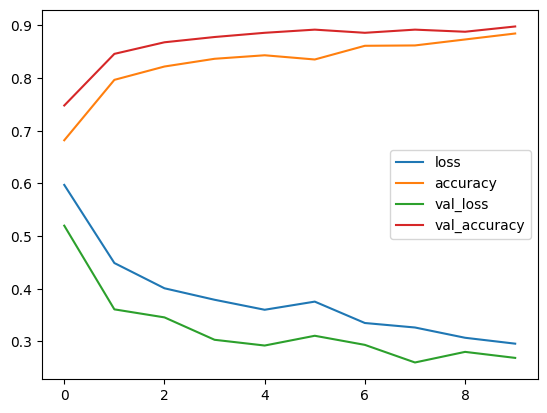

In [39]:
import pandas as pd
history=pd.DataFrame(history1.history)
history.plot()

Image shape:(512, 512, 3)
Image shape:(384, 512, 3)


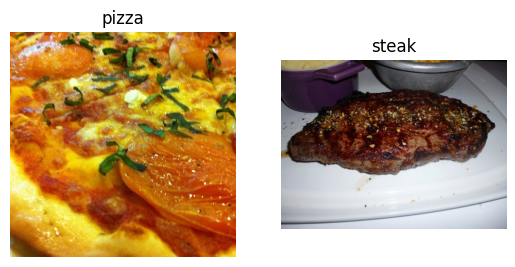

In [10]:
plt.figure()
plt.subplot(1,2,1)
img1=show_random_image("train","pizza")
plt.subplot(1,2,2)
img2=show_random_image("train","steak")

In [11]:
!nvidia-smi

Thu Jun  1 14:03:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.108.03   Driver Version: 510.108.03   CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   63C    P3    19W /  N/A |   3384MiB /  4096MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
images,labels=train_data.next() #gets the next batch of training data
labels

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)

In [13]:
len(train_data)

47

In [14]:
1500/32  #Total images=1500 batch size=32 Therefore 47 batches

46.875

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [31]:
model2=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="selu",        #Input layer with input shape
            strides=1,padding="same",input_shape=(224,224,3)), #if padding is same, output=input shape
    Conv2D(10,3,activation="selu",padding="same"),
    Conv2D(10,3,activation="selu",padding="same"),
    Flatten(),
    Dense(1,activation="sigmoid")
    ])

In [33]:
model2.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer=Adam(0.01))

In [34]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 501760)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 501761    
                                                                 
Total params: 503,861
Trainable params: 503,861
Non-trainable params: 0
_________________________________________________________________


In [35]:
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 113ms/step - loss: 144.1442 - accuracy: 0.6100 - val_loss: 5.5713 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 3.7669 - accuracy: 0.7760 - val_loss: 3.4686 - val_accuracy: 0.6720
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5161 - accuracy: 0.9020 - val_loss: 1.5295 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.1792 - accuracy: 0.9547 - val_loss: 1.4601 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.0534 - accuracy: 0.9847 - val_loss: 1.4022 - val_accuracy: 0.7880


<Axes: >

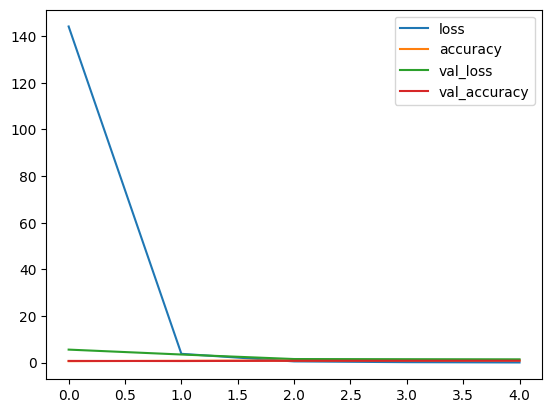

In [36]:
history2=pd.DataFrame(history2.history)
history2.plot()

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

2023-06-02 23:25:47.689455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 23:25:49.052577: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-02 23:25:49.052702: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-02 23:25:49.052713: W tensorflow/compiler/tf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator

train_dir="./pizza_steak/train/"
test_dir="./pizza_steak/test/"

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                                    batch_size=32,class_mode="binary",shuffle=True)#Shuffling make model more general
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                                    batch_size=32,class_mode="binary",shuffle=False)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
images,labels=train_data_augmented.next()

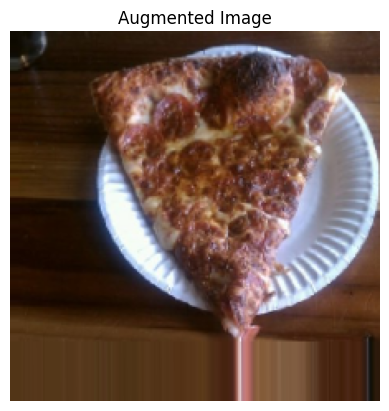

In [18]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

random_number=random.randint(0,31)

plt.title("Augmented Image")
plt.axis("off")
plt.imshow(images[random_number])

In [19]:
len(train_data_augmented)

47

In [20]:
47*32

1504

In [75]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model3=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="selu",input_shape=(224,224,3)),
    Conv2D(filters=10,kernel_size=3,activation="selu"),
    MaxPool2D(),
    Conv2D(filters=10,kernel_size=3,activation="selu"),
    Conv2D(filters=10,kernel_size=3,activation="selu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [76]:
from keras.optimizers import Adam

model3.compile(optimizer=Adam(),metrics=["accuracy"],loss="binary_crossentropy")
history3=model3.fit(train_data_augmented,epochs=10,steps_per_epoch=len(train_data_augmented),
        validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 14s 284ms/step - loss: 0.7547 - accuracy: 0.6153 - val_loss: 0.5066 - val_accuracy: 0.7600
Epoch 2/10
47/47 [==============================] - 12s 245ms/step - loss: 0.5968 - accuracy: 0.6907 - val_loss: 0.4817 - val_accuracy: 0.7940
Epoch 3/10
47/47 [==============================] - 12s 244ms/step - loss: 0.5705 - accuracy: 0.7087 - val_loss: 0.4649 - val_accuracy: 0.7800
Epoch 4/10
47/47 [==============================] - 12s 245ms/step - loss: 0.5878 - accuracy: 0.7120 - val_loss: 0.5327 - val_accuracy: 0.7380
Epoch 5/10
47/47 [==============================] - 12s 244ms/step - loss: 0.5813 - accuracy: 0.7060 - val_loss: 0.4811 - val_accuracy: 0.7700
Epoch 6/10
47/47 [==============================] - 12s 245ms/step - loss: 0.5528 - accuracy: 0.7280 - val_loss: 0.4183 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 12s 249ms/step - loss: 0.5435 - accuracy: 0.7287 - val_loss: 0.4447 - val_accuracy: 0.8160

In [105]:
def plot_loss_curves(history):
    train_loss=history.history["loss"]
    accuracy=history.history["accuracy"]
    val_loss=history.history["val_loss"]
    val_accuracy=history.history["val_accuracy"]
    epochs=range(len(history.history["loss"]))

    plt.plot(epochs,train_loss,label="training_loss")
    # plt.subplot(1,4,2)
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.plot(epochs,accuracy,label="train_accuracy")
    # plt.subplot(1,4,4)
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

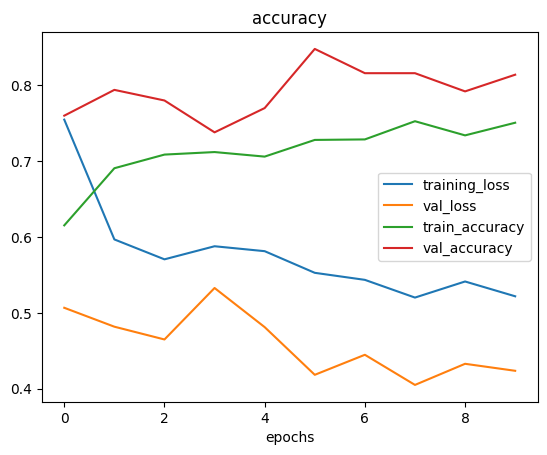

In [78]:
plot_loss_curves(history3)

In [59]:
import matplotlib.image as mpimg

image=mpimg.imread("./test.jpg")
image=image/255.
image

array([[[0.88235294, 0.50588235, 0.45882353],
        [0.8627451 , 0.48627451, 0.43921569],
        [0.83921569, 0.4627451 , 0.41568627],
        ...,
        [0.44313725, 0.39215686, 0.36078431],
        [0.44705882, 0.39607843, 0.36078431],
        [0.44705882, 0.39607843, 0.36078431]],

       [[0.88627451, 0.50980392, 0.4627451 ],
        [0.87058824, 0.49411765, 0.44705882],
        [0.85098039, 0.4745098 , 0.42745098],
        ...,
        [0.45098039, 0.39607843, 0.36078431],
        [0.45098039, 0.39607843, 0.36078431],
        [0.45098039, 0.39607843, 0.35294118]],

       [[0.89019608, 0.51372549, 0.45882353],
        [0.87843137, 0.50196078, 0.44705882],
        [0.8627451 , 0.48627451, 0.43137255],
        ...,
        [0.43921569, 0.36862745, 0.32941176],
        [0.43921569, 0.37254902, 0.33333333],
        [0.43921569, 0.37647059, 0.3254902 ]],

       ...,

       [[0.41568627, 0.30980392, 0.22745098],
        [0.40784314, 0.30196078, 0.21960784],
        [0.41176471, 0

In [69]:
import tensorflow as tf

def load_and_prep_image(filename):
    image=tf.io.read_file(filename)
    image=tf.image.decode_image(image)
    image=tf.image.resize(image,size=[224,224])
    image=image/255.

    return image

In [79]:
image=load_and_prep_image("./test.jpg")
image.shape

TensorShape([224, 224, 3])

In [83]:
pred=model3.predict(tf.expand_dims(image,axis=0))

1/1 [==============================] - 0s 56ms/step


In [84]:
class_names=["pizza","steak"]

Text(0.5, 1.0, 'Prediction=pizza')

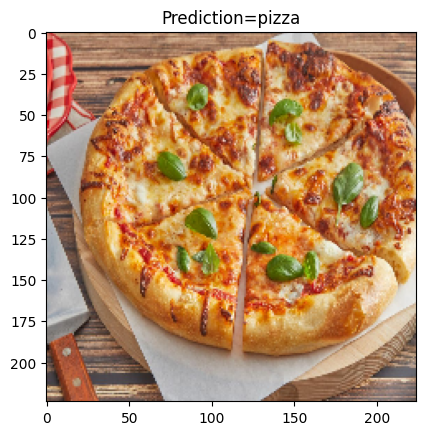

In [87]:
plt.imshow(image)
pred_class=class_names[int(tf.round(pred))]
plt.title(f"Prediction={pred_class}")

In [3]:
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [6]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories, {len(filenames)} images in {dirpath}")

There are 2 directories, 0 images in 10_food_classes_all_data
There are 10 directories, 0 images in 10_food_classes_all_data/train
There are 0 directories, 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories, 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories, 750 images in 10_food_classes_all_data/train/steak
There are 0 directories, 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories, 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories, 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories, 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories, 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories, 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories, 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 10 directories, 0 images in 10_food_classes_all_data/test
The

In [14]:
class_labels=sorted(os.listdir("./10_food_classes_all_data/train/"))
class_labels

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_random_image(target_dir,target_class):
    target_folder=f"10_food_classes_all_data/{target_dir}/{target_class}"
    random_image=random.sample(os.listdir(target_folder),1)

    img=mpimg.imread(target_folder+"/"+random_image[0])
    print(img.shape)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

(384, 512, 3)


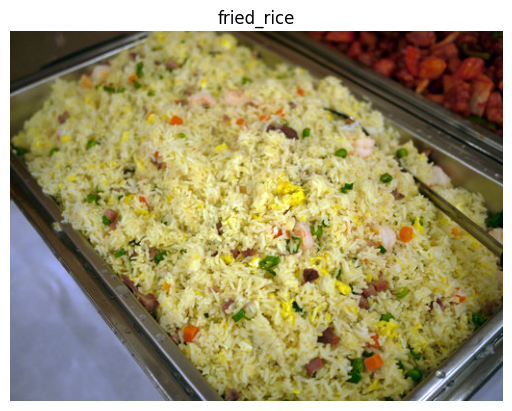

In [64]:
show_random_image("train",random.choice(class_labels))

In [86]:
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator

In [66]:
train_dir="./10_food_classes_all_data/train/"
test_dir="./10_food_classes_all_data/test/"

train_datagen=ImageDataGenerator(rescale=1/255.)
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                            class_mode="categorical",batch_size=32,seed=42)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                            class_mode="categorical",batch_size=32,seed=42)
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                            class_mode="categorical",batch_size=32,seed=42)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [87]:
tf.random.set_seed(42)

model4=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="leaky_relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="leaky_relu"),
    Conv2D(10,3,activation="leaky_relu"),
    Conv2D(10,3,activation="leaky_relu"),
    Flatten(),
    Dense(10,activation="softmax")
])

model4.compile(optimizer=Adam(),loss=CategoricalCrossentropy(),metrics=["accuracy"])

In [88]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 216, 216, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 466560)            0         
                                                                 
 dense_3 (Dense)             (None, 10)                4665610   
                                                                 
Total params: 4,668,620
Trainable params: 4,668,620
No

In [89]:
history4=model4.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 259ms/step - loss: 2.3798 - accuracy: 0.1801 - val_loss: 2.0687 - val_accuracy: 0.2608
Epoch 2/5
235/235 [==============================] - 57s 244ms/step - loss: 2.1073 - accuracy: 0.2472 - val_loss: 1.9540 - val_accuracy: 0.3104
Epoch 3/5
235/235 [==============================] - 54s 230ms/step - loss: 2.1042 - accuracy: 0.2521 - val_loss: 1.9746 - val_accuracy: 0.3104
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 2.0518 - accuracy: 0.2728 - val_loss: 1.9320 - val_accuracy: 0.3148
Epoch 5/5
235/235 [==============================] - 59s 252ms/step - loss: 2.0378 - accuracy: 0.2740 - val_loss: 1.8944 - val_accuracy: 0.3312


<Axes: >

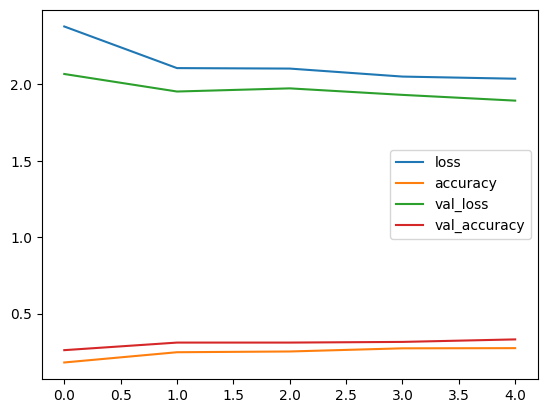

In [95]:
# import pandas as pd

# history4df=pd.DataFrame(history4.history)
# history4df.plot()
history4.plot()

In [97]:
tf.random.set_seed(42)

model5=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="leaky_relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="leaky_relu"),
    MaxPooling2D(),
    Conv2D(10,3,activation="leaky_relu"),
    Conv2D(10,3,activation="leaky_relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model5.compile(optimizer=Adam(),loss=CategoricalCrossentropy(),metrics=["accuracy"])

In [98]:
history5=model5.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 73s 308ms/step - loss: 2.2090 - accuracy: 0.1856 - val_loss: 2.0044 - val_accuracy: 0.2976
Epoch 2/5
235/235 [==============================] - 72s 308ms/step - loss: 2.0662 - accuracy: 0.2688 - val_loss: 1.9800 - val_accuracy: 0.2952
Epoch 3/5
235/235 [==============================] - 71s 301ms/step - loss: 2.0252 - accuracy: 0.2812 - val_loss: 1.8891 - val_accuracy: 0.3436
Epoch 4/5
235/235 [==============================] - 81s 346ms/step - loss: 1.9885 - accuracy: 0.3061 - val_loss: 1.8428 - val_accuracy: 0.3540
Epoch 5/5
235/235 [==============================] - 93s 394ms/step - loss: 1.9495 - accuracy: 0.3165 - val_loss: 1.9133 - val_accuracy: 0.3396


<Axes: >

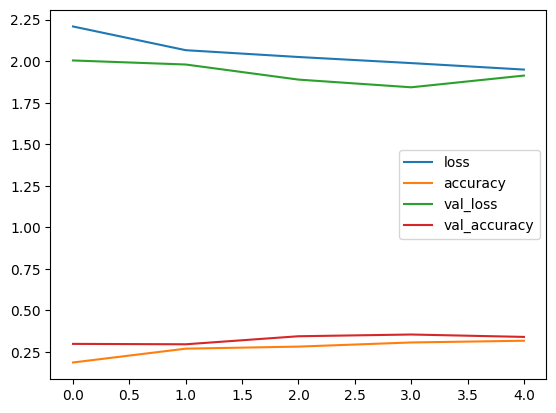

In [102]:
history5df=pd.DataFrame(history5.history)
history5df.plot()

In [103]:
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [107]:
history5_2=model5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 19s 82ms/step - loss: 0.0252 - accuracy: 0.9953 - val_loss: 4.8414 - val_accuracy: 0.3084
Epoch 2/5
235/235 [==============================] - 19s 80ms/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 5.2418 - val_accuracy: 0.3148
Epoch 3/5
235/235 [==============================] - 21s 91ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 5.7242 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 22s 93ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 5.9269 - val_accuracy: 0.3160
Epoch 5/5
235/235 [==============================] - 22s 93ms/step - loss: 6.1759e-04 - accuracy: 1.0000 - val_loss: 6.1495 - val_accuracy: 0.3136


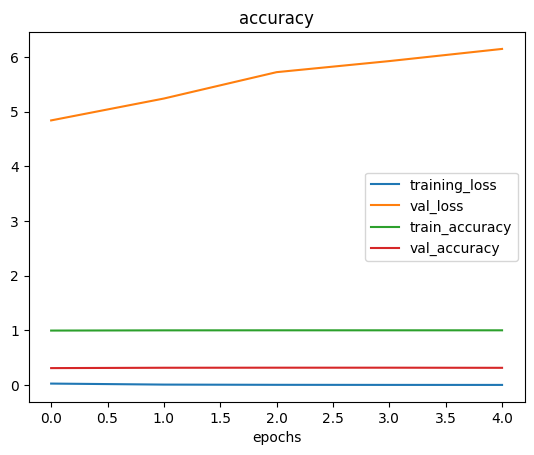

In [108]:
plot_loss_curves(history5_2)
#Model is overfitting

In [109]:
#Reducing number of Conv2D layers to reduce overfitting

tf.random.set_seed(42)

model6=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="leaky_relu",input_shape=(224,224,3)),
    MaxPooling2D(),
    Conv2D(10,3,activation="leaky_relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model6.compile(optimizer=Adam(),loss=CategoricalCrossentropy(),metrics=["accuracy"])

In [110]:
history6=model6.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 18s 76ms/step - loss: 2.1061 - accuracy: 0.2523 - val_loss: 1.9559 - val_accuracy: 0.3000
Epoch 2/5
235/235 [==============================] - 21s 88ms/step - loss: 1.7949 - accuracy: 0.3929 - val_loss: 1.9768 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 18s 76ms/step - loss: 1.4767 - accuracy: 0.5144 - val_loss: 1.9875 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 21s 89ms/step - loss: 1.0252 - accuracy: 0.6767 - val_loss: 2.1589 - val_accuracy: 0.3136
Epoch 5/5
235/235 [==============================] - 18s 75ms/step - loss: 0.5902 - accuracy: 0.8369 - val_loss: 2.5485 - val_accuracy: 0.3012


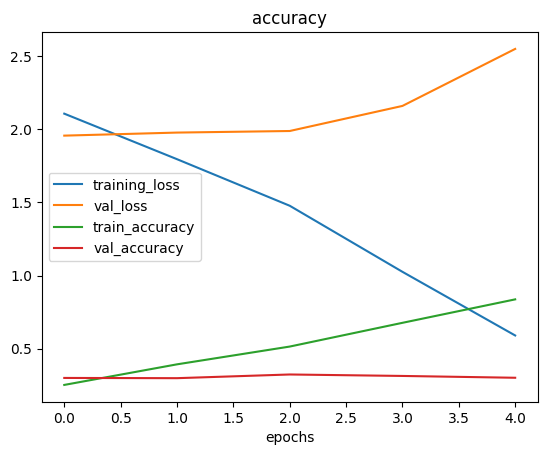

In [111]:
plot_loss_curves(history6)

In [112]:
model6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 29160)             0         
                                                                 
 dense_6 (Dense)             (None, 10)              

In [115]:
history6_2=model6.fit(train_data_augmented,epochs=10,steps_per_epoch=len(train_data),
                    validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 58s 245ms/step - loss: 1.9737 - accuracy: 0.3165 - val_loss: 1.7784 - val_accuracy: 0.3824
Epoch 2/10
235/235 [==============================] - 60s 256ms/step - loss: 1.9603 - accuracy: 0.3233 - val_loss: 1.7838 - val_accuracy: 0.3952
Epoch 3/10
235/235 [==============================] - 59s 251ms/step - loss: 1.9371 - accuracy: 0.3327 - val_loss: 1.7972 - val_accuracy: 0.3848
Epoch 4/10
235/235 [==============================] - 64s 271ms/step - loss: 1.9372 - accuracy: 0.3304 - val_loss: 1.8684 - val_accuracy: 0.3660
Epoch 5/10
235/235 [==============================] - 56s 238ms/step - loss: 1.9239 - accuracy: 0.3368 - val_loss: 1.7702 - val_accuracy: 0.4020
Epoch 6/10
235/235 [==============================] - 56s 237ms/step - loss: 1.8944 - accuracy: 0.3487 - val_loss: 1.8013 - val_accuracy: 0.3892
Epoch 7/10
235/235 [==============================] - 55s 232ms/step - loss: 1.9026 - accuracy: 0.3513 - val_loss: 1.7583 - val_ac

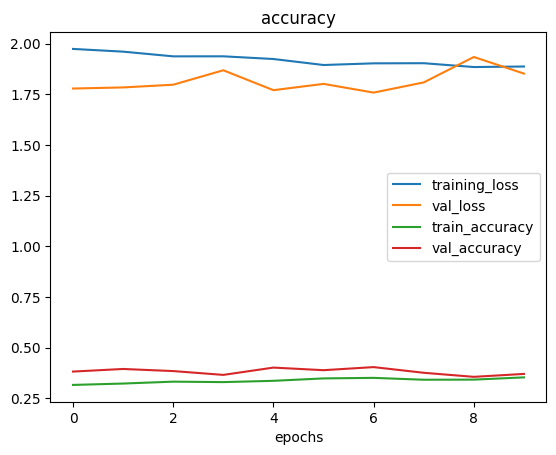

In [116]:
plot_loss_curves(history6_2)

In [117]:
model6.save("saved_model6")

INFO:tensorflow:Assets written to: saved_model6/assets


INFO:tensorflow:Assets written to: saved_model6/assets


In [122]:
loaded_model6=keras.models.load_model("saved_model6")

In [124]:
loaded_model6.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [120]:
model6.evaluate(test_data)

79/79 [==============================] - 4s 54ms/step - loss: 1.8521 - accuracy: 0.3708


[1.852128505706787, 0.3707999885082245]